# 2023 vs. 2024: Exploratory Data Analysis & Comparative performance

- Análise mercadologica das corridas
- Aumento do hype
- Maior participação de jovens
- Diminuição da performance
- Estudo das maiores reincidências (agrupamentos e tals...)
- Estudo dos avanços e retrocessos (as pessoas geralmente melhoram ou pioram? Qual o máximo que dá pra melhorar em um ano?)
- Tentar fazer alguma previsão

#### Hipóteses
- Corredores reincidentes são melhores!
- Corredores mais velhos são melhores!
- Existe um grupo específico com maior chance de reincidência!

## 0. Imports

In [1]:
import pandas as pd
import json
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from random import randint
from math import ceil, floor
import matplotlib.image as mpimg

from matplotlib.ticker import FuncFormatter

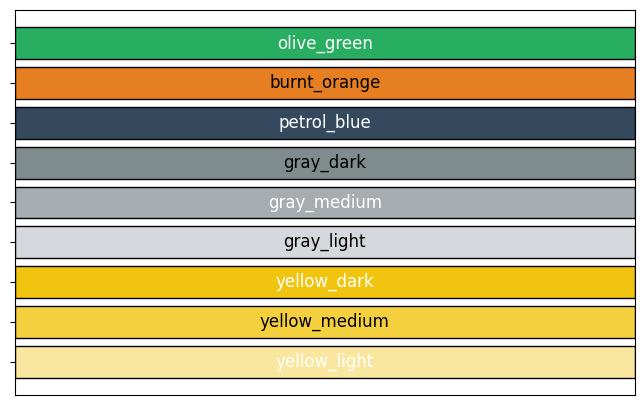

In [2]:
# Importing visual identity
def load_color_palette(file_path):
    with open(file_path, 'r') as file:
        color_palette = json.load(file)
    return color_palette

file_path = r'..\utils\color_palette.json'
color_palette = load_color_palette(file_path)

fig, ax = plt.subplots(figsize=(8, 5))

# Loop para mostrar cada cor
for i, (name, color) in enumerate(color_palette.items()):
    ax.barh(i, 1, color=color, edgecolor='black')
    ax.text(0.5, i, name, va='center', ha='center', fontsize=12, color='white' if i%2 == 0 else 'black')

# Configurações do eixo
ax.set_xlim(0, 1)
ax.set_yticks(range(len(color_palette)))
ax.set_yticklabels([])
ax.set_xticks([])

plt.show()

In [3]:
def colocar_logo(_fig, tamanho=1, alpha=0.5):  # Add 'alpha' parameter for transparency

    logo = mpimg.imread(r'..\utils\corrida_do_galo.png')
    x_size = 0.06 * tamanho
    y_size = x_size / 2
    x_coord = 0.97 - x_size
    y_coord = 0.98 - y_size
    logo_ax = _fig.add_axes([x_coord, y_coord, x_size, y_size], anchor='NE', zorder=1)
    
    # Display the image with transparency
    logo_ax.imshow(logo, alpha=alpha)
    logo_ax.axis('off')

## 1. Data extraction

In [4]:
dir_path = r'..\data\treated'
files = os.listdir(dir_path)
dfs = {}

for _file in files:
    file_path = os.path.join(dir_path, _file)
    df = pd.read_parquet(file_path)
    df['year'] = int(_file.replace('.parquet', '').replace('results_', ''))
    dfs[_file.replace('.parquet', '')] = df

df = pd.concat([dfs['results_2024'], dfs['results_2023']], ignore_index=True)

## 2. Check data quality

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           19720 non-null  int64  
 1   num           19720 non-null  int64  
 2   athlete       19720 non-null  object 
 3   gender        19720 non-null  object 
 4   age           19720 non-null  int64  
 5   group         19720 non-null  object 
 6   ag            19700 non-null  float64
 7   c             19720 non-null  object 
 8   team          19720 non-null  object 
 9   time          19720 non-null  object 
 10  distance      19720 non-null  object 
 11  part_time_h   19720 non-null  int64  
 12  part_time_m   19720 non-null  int64  
 13  part_time_s   19720 non-null  int64  
 14  total_time_s  19720 non-null  int64  
 15  total_time_m  19720 non-null  float64
 16  total_time_h  19720 non-null  float64
 17  dist_num      19720 non-null  int64  
 18  pace          19720 non-nu

In [6]:
df.describe()

,pos,num,age,ag,part_time_h,part_time_m,part_time_s,total_time_s,total_time_m,total_time_h,dist_num,year
count,19720.000000,19720.000000,19720.000000,19700.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000,19720.000000
mean,1762.182809,6312.573529,38.610041,195.853350,0.189300,35.433215,29.444270,2836.917901,47.281965,0.788033,6.005071,2023.575355
std,1311.150288,3976.380134,13.011585,174.743207,0.439697,14.237690,17.299366,1199.005143,19.983419,0.333057,2.003844,0.494302
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,936.000000,15.600000,0.260000,5.000000,2023.000000
25%,627.000000,3052.750000,30.000000,58.000000,0.000000,30.000000,15.000000,2093.000000,34.883333,0.581389,5.000000,2023.000000
50%,1474.500000,6003.000000,39.000000,142.000000,0.000000,37.000000,29.000000,2522.000000,42.033333,0.700556,5.000000,2024.000000
75%,2707.000000,9186.500000,47.000000,292.000000,0.000000,45.000000,44.000000,3254.000000,54.233333,0.903889,5.000000,2024.000000
max,5251.000000,16901.000000,86.000000,826.000000,3.000000,59.000000,59.000000,11929.000000,198.816667,3.313611,10.000000,2024.000000


In [7]:
values = df['gender'].unique()
print(f'Gender variations: {values}')

values = sorted(df['group'].unique())
print(f'Group variations: {values}')

Gender variations: ['F' 'M']
Group variations: ['F0014', 'F1519', 'F2024', 'F2529', 'F3034', 'F3539', 'F4044', 'F4549', 'F5054', 'F5559', 'F6064', 'F6569', 'F7074', 'F7579', 'F8084', 'M0014', 'M1519', 'M2024', 'M2529', 'M3034', 'M3539', 'M4044', 'M4549', 'M5054', 'M5559', 'M6064', 'M6569', 'M7074', 'M7579', 'M8084', 'M8589']


## 2½. Quick features

#### 2½.1 Has Team

In [8]:
df['has_team'] = df['team'].apply(lambda g: True if not g.strip() == '' else False)

#### 2½.2 Running Again

In [9]:
def get_reincidence(df, years=[2023, 2024]):

    df_dict = {}

    for i, year in enumerate(years):

        # Separate the dataframe into two based on the year
        df_dict[str(year)] = df.loc[df['year'] == year, ['num', 'athlete', 'age']]

    # Merge the datasets on 'Name' to compare ages
    merged = pd.merge(df_dict[list(df_dict.keys())[0]], df_dict[list(df_dict.keys())[1]], on='athlete', how='left', suffixes=('_1', '_2'))

    # Filter for returning runners where the age difference is 2 years or less
    returning_runners = merged.loc[(merged['age_2'].notnull()) & (abs(merged['age_1'] - merged['age_2']) <= 2)]
    returning_runners.loc[:, 'running_again'] = True

    # Filter for new runners who are either not in the 2023 dataset or have a large age difference
    new_runners = merged.loc[merged['age_2'].isnull() | (abs(merged['age_1'] - merged['age_2']) > 2)]
    new_runners.loc[:, 'running_again'] = False

    # Combine the results
    classified_runners = pd.concat([returning_runners.loc[:, ['num_1', 'athlete', 'age_1', 'running_again']], new_runners.loc[:, ['num_1', 'athlete', 'age_1', 'running_again']]])

    # Rename columns for clarity
    classified_runners = classified_runners.rename(columns={'age_1': 'age'})

    # Dropping duplicates from same year
    classified_runners = classified_runners.drop_duplicates(subset=['num_1'])

    # Display the result
    return classified_runners


In [10]:
reincidence_2024 = get_reincidence(df, years=[2024, 2023])
reincidence_2024.columns = ['num', 'athlete', 'age', 'running_again']
reincidence_2023 = get_reincidence(df, years=[2023, 2024])
reincidence_2023.columns = ['num', 'athlete', 'age', 'running_again']
reincidence = pd.concat([reincidence_2024, reincidence_2023]).drop('age', axis=1)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252305180.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  returning_runners.loc[:, 'running_again'] = True
C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252305180.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_runners.loc[:, 'running_again'] = False
C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252305180.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [11]:
df['athlete'] = df['athlete'].str.replace('\n', ' ').str.replace('  ', ' ')
df = df.merge(right=reincidence, on=['num', 'athlete'], how='left')
df['running_again'] = df['running_again'].fillna(False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3615566596.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['running_again'] = df['running_again'].fillna(False)


## 3. Data comprehention

### 3.1. Athletes

#### 3.1.1. Total athletes

In [12]:
total_2023 = df.loc[df['year'] == 2023, 'num'].count()
total_2024 = df.loc[df['year'] == 2024, 'num'].count()
print(f'Total athletes in 2023: {total_2023}\nTotal athletes in 2024: {total_2024}')

variacao = (total_2024 - total_2023) / total_2023
sinal = '+' if variacao > 0 else '-'
variacao_str = f'{sinal}{variacao:.1%}'
print(f'Vriation of {variacao_str} athletes between 2023-24 editions')

Total athletes in 2023: 8375
Total athletes in 2024: 11347
Vriation of +35.5% athletes between 2023-24 editions


#### 3.1.2. Total athletes vs. distance

In [13]:
total_2023_5 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 5), 'num'].count()
total_2023_10 = df.loc[(df['year'] == 2023) & (df['dist_num'] == 10), 'num'].count()
total_2023_5_percent = total_2023_5 / (total_2023_5+total_2023_10)
total_2023_10_percent = total_2023_10 / (total_2023_5+total_2023_10)

total_2024_5 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 5), 'num'].count()
total_2024_10 = df.loc[(df['year'] == 2024) & (df['dist_num'] == 10), 'num'].count()
total_2024_5_percent = total_2024_5 / (total_2024_5+total_2024_10)
total_2024_10_percent = total_2024_10 / (total_2024_5+total_2024_10)

print(f'2023 distance distribuition: {total_2023_5} 5km vs {total_2023_10} 10km ({total_2023_5_percent:.1%} vs {total_2023_10_percent:.1%})')
print(f'2024 distance distribuition: {total_2024_5} 5km vs {total_2024_10} 10km ({total_2024_5_percent:.1%} vs {total_2024_10_percent:.1%})')

2023 distance distribuition: 6508 5km vs 1867 10km (77.7% vs 22.3%)
2024 distance distribuition: 9248 5km vs 2099 10km (81.5% vs 18.5%)


#### 3.1.3. Total athletes vs. gender

In [14]:
total_2023_m = df.loc[(df['year'] == 2023) & (df['gender'] == 'M'), 'num'].count()
total_2023_f = df.loc[(df['year'] == 2023) & (df['gender'] == 'F'), 'num'].count()
total_2023_m_percent = total_2023_m / (total_2023_m+total_2023_f)
total_2023_f_percent = total_2023_f / (total_2023_m+total_2023_f)

total_2024_m = df.loc[(df['year'] == 2024) & (df['gender'] == 'M'), 'num'].count()
total_2024_f = df.loc[(df['year'] == 2024) & (df['gender'] == 'F'), 'num'].count()
total_2024_m_percent = total_2024_m / (total_2024_m+total_2024_f)
total_2024_f_percent = total_2024_f / (total_2024_m+total_2024_f)

print(f'2023 gender distribuition: {total_2023_m} M vs {total_2023_f} F ({total_2023_m_percent:.1%} vs {total_2023_f_percent:.1%})')
print(f'2024 gender distribuition: {total_2024_m} M vs {total_2024_f} F ({total_2024_m_percent:.1%} vs {total_2024_f_percent:.1%})')

2023 gender distribuition: 4254 M vs 4121 F (50.8% vs 49.2%)
2024 gender distribuition: 5439 M vs 5908 F (47.9% vs 52.1%)


#### 3.1.4. Total athletes vs. ages

In [15]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')
pivot_ages_transp = pivot_ages.T

pivot_ages_transp['2023_percent'] = pivot_ages_transp[2023] / pivot_ages_transp[2023].sum()
pivot_ages_transp['2024_percent'] = pivot_ages_transp[2024] / pivot_ages_transp[2024].sum()

pivot_ages = pivot_ages_transp.T
pivot_ages


C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\1443749921.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_ages = pd.pivot_table(df, values='num', index='year', columns='age_group', aggfunc='count')


age_group,1-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90
year,,,,,,,,,
2023,51.000000,471.000000,1290.000000,2445.000000,2537.000000,1078.000000,368.000000,62.000000,2.000000
2024,37.000000,820.000000,2321.000000,3189.000000,2995.000000,1368.000000,424.000000,65.000000,11.000000
2023_percent,0.006142,0.056720,0.155347,0.294436,0.305515,0.129817,0.044316,0.007466,0.000241
2024_percent,0.003295,0.073019,0.206679,0.283972,0.266696,0.121817,0.037756,0.005788,0.000980


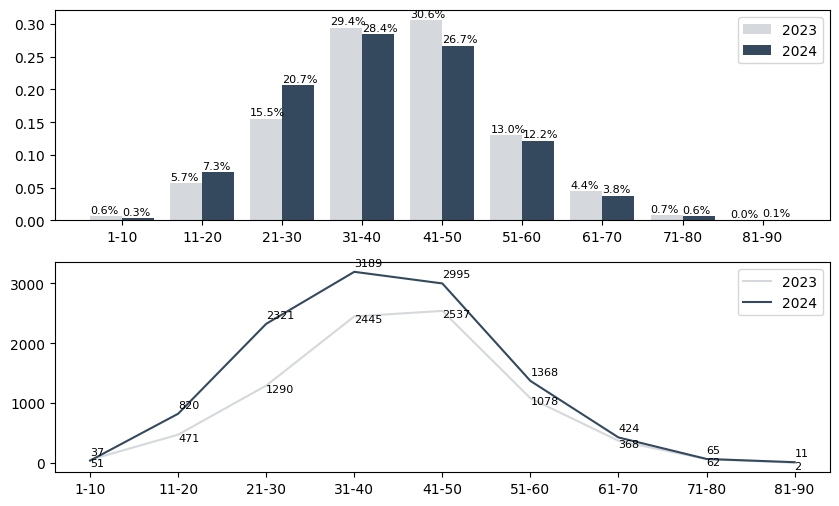

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(10,6))

bar_width = 0.4

index = pivot_ages_transp.index
xs = np.arange(len(index))
percent_2023 = pivot_ages_transp['2023_percent'].values
percent_2024 = pivot_ages_transp['2024_percent'].values

axs[0].bar(x=xs-bar_width/2, height=percent_2023, width=bar_width, color=color_palette['gray_light'], label='2023')
axs[0].bar(x=xs+bar_width/2, height=percent_2024, width=bar_width, color=color_palette['petrol_blue'], label='2024')

total_2023 = pivot_ages_transp[2023].values
total_2024 = pivot_ages_transp[2024].values

axs[1].plot(total_2023, c=color_palette['gray_light'], label='2023')
axs[1].plot(total_2024, c=color_palette['petrol_blue'], label='2024')

for i, x in enumerate(xs):
    p_2023 = percent_2023[i]
    axs[0].annotate(text=f'{p_2023:.1%}', xy=(x-bar_width, percent_2023[i]+0.005), fontsize=8)

    p_2024 = percent_2024[i]
    axs[0].annotate(text=f'{p_2024:.1%}', xy=(x, percent_2024[i]+0.005), fontsize=8)

    t_2023 = total_2023[i]
    axs[1].annotate(text=f'{t_2023}', xy=(x, total_2023[i]-100), fontsize=8)

    t_2024 = total_2024[i]
    axs[1].annotate(text=f'{t_2024}', xy=(x, total_2024[i]+100), fontsize=8)

axs[0].set_xticks(xs)
axs[0].set_xticklabels(index)

axs[1].set_xticks(xs)
axs[1].set_xticklabels(index)

axs[0].legend()
axs[1].legend()

plt.show()

#### 3.1.5 Considerations

There has been a significant increse in total athletes from 2023 to 2024

Possible increse of athletes interest in the 5km race (2023: 5km 77.7% vs 10km 22.3% / 2024: 5km 81.5% vs 10km 18.5%) + 3.8%

People from 21 to 40 yo seems to have gained significantly more interest in Galo's Race

### 3.2. Gerneral performance - average pace

- Qual o pace médio geral 23 vs 24?
- Qual o pace médio por categoria 23 vs 24?
- Qual o pace médio por age group & categoria 23 vs 24?

In [17]:
def get_mean_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].sum())
    filtered_dataframe.columns = ['summed_time', 'summed_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['summed_time'] / filtered_dataframe['summed_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

In [18]:
def get_median_pace(dataframe, total_time_column:str, dist_column:str, add_groupby_columns:list=None):
    
    groupby_columns = [dist_column]
    groupby_columns.extend(add_groupby_columns)
    filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].median())
    filtered_dataframe.columns = ['median_time', 'median_dist']
    filtered_dataframe = filtered_dataframe.reset_index()
    filtered_dataframe['pace_s'] = filtered_dataframe['median_time'] / filtered_dataframe['median_dist']
    filtered_dataframe['pace_s'] = filtered_dataframe['pace_s'].fillna(0)
    filtered_dataframe['pace_time'] = filtered_dataframe['pace_s'].apply(lambda t: time.strftime('%M:%S', time.gmtime(t)))

    return filtered_dataframe

In [19]:
# Function to convert seconds to "mm:ss" format
def seconds_to_pace(x: float, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f'{minutes:02d}:{seconds:02d}'

#### 3.2.1. Avg  Pace: by distance, gender and year

In [20]:
def plot_paces(df, display:str, summarize_by:list, plot_palette:list=None, figsize=None, fig_title=None, annotate=1, metrics=None):

    for i, column in enumerate(summarize_by):
        if i == 0:
            df['category'] = df[summarize_by[0]].astype(str)
        else:
            df['category'] = df['category'].str.cat(df[column].astype(str), sep='-')

    years = df['year'].unique()
    distances = df['dist_num'].unique()

    if metrics == None:
        metrics = []

    if plot_palette == None:
        plot_palette = [color_palette["gray_light"], color_palette["petrol_blue"]]

    if display == 'h':
        n_cols = len(distances)
        n_rows = 1
    elif display == 'v':
        n_cols = 1
        n_rows = len(distances)
    
    if not figsize:
        figsize = (n_cols*5,n_rows*3)

    fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize)

    if fig_title:
        fig.suptitle(fig_title, fontsize=16, fontweight='bold', x=0, ha='left', color=color_palette['gray_dark'])
        colocar_logo(fig, tamanho=4.3-figsize[1]**(1/2))

    bar_width = 0.4

    for p, distance in enumerate(distances):
        mean_pace_distance_df = df.loc[df['dist_num'] == distance]

        if 'max' in metrics:
            max_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].max()
            ax[p].axhline(y=max_pace, color=color_palette['yellow_light'], linestyle='--', label=f'Max')

        if 'mean' in metrics:
            mean_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].mean()
            ax[p].axhline(y=mean_pace, color=color_palette['olive_green'], linestyle='--', label=f'Mean')

        if 'min' in metrics:
            min_pace = mean_pace_distance_df.loc[mean_pace_distance_df['pace_s'] > 0, 'pace_s'].min()
            ax[p].axhline(y=min_pace, color=color_palette['yellow_dark'], linestyle='--', label=f'Min')

        for i, year in enumerate(years):
            mean_pace_df_filtered = mean_pace_distance_df.loc[mean_pace_distance_df['year'] == year]
            pace_values_s = mean_pace_df_filtered['pace_s'].values
            pace_formatted = mean_pace_df_filtered['pace_time'].values
            index = mean_pace_df_filtered['category'].values
            xs = np.arange(len(index))

            n_years = len(years)
            horizontal_offset = bar_width*(-n_years/2 + 0.5 + i)
            ax[p].bar(x=xs+horizontal_offset, height=pace_values_s, width=bar_width, align='center', color=plot_palette[i], label=year)

            top_annotate_sort = ceil(annotate *100)
            for j, x in enumerate(xs):
                if top_annotate_sort > randint(0, 100):
                    ax[p].annotate(text=pace_formatted[j] ,xy=(x+horizontal_offset, pace_values_s[j]+5), ha='center')

            ax[p].set_xticks(xs)
            ax[p].set_xticklabels(index)

            # Apply custom Y-axis labels
            formatter = FuncFormatter(seconds_to_pace)
            ax[p].yaxis.set_major_formatter(formatter)

        # Add labels and legend
        ax[p].set_xlabel(f'Distance: {distance} km')
        ax[p].set_ylabel('Pace')
        ax[p].legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

MEAN PACE (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


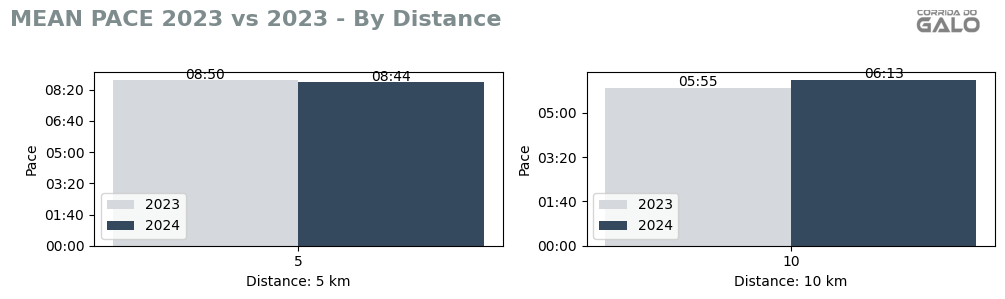

In [21]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['year'])
plot_paces(mean_pace_df, display='h', summarize_by=['dist_num'], fig_title='MEAN PACE 2023 vs 2023 - By Distance')

MEDIAN PACE (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


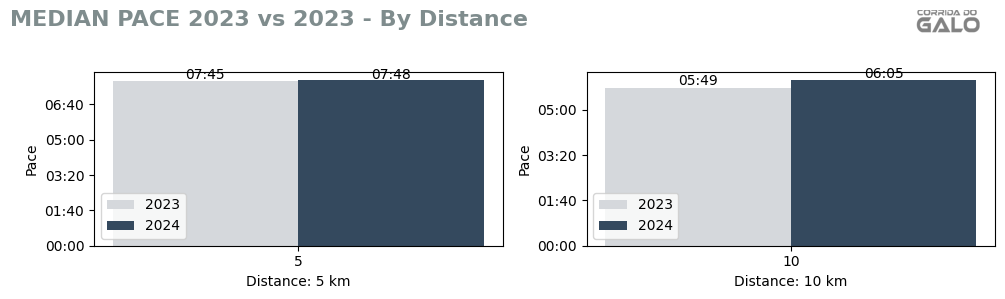

In [22]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['year'])
plot_paces(mean_pace_df, display='h', summarize_by=['dist_num'], fig_title='MEDIAN PACE 2023 vs 2023 - By Distance')

MEAN PACE By GENDER (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


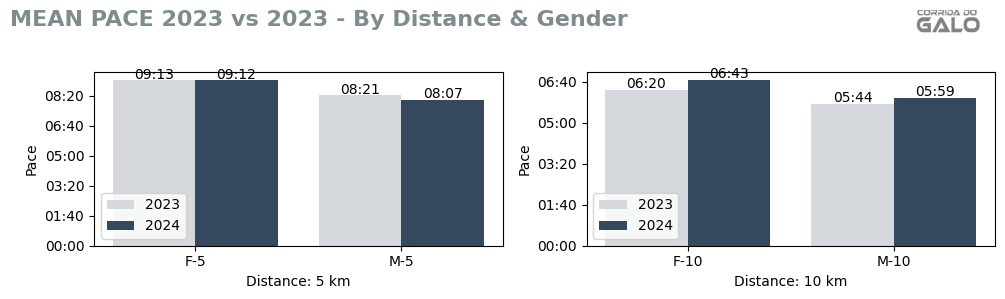

In [23]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df, display='h', summarize_by=['gender', 'dist_num'], fig_title='MEAN PACE 2023 vs 2023 - By Distance & Gender')

MEDIAN PACE By GENDER (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


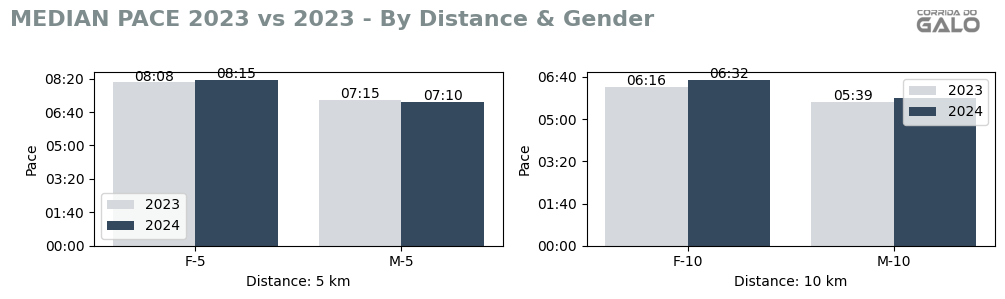

In [24]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['gender', 'year'])
plot_paces(mean_pace_df, display='h', summarize_by=['gender', 'dist_num'], fig_title='MEDIAN PACE 2023 vs 2023 - By Distance & Gender')

MEAN PACE By AGE GROUP (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\1384047525.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].sum())
C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


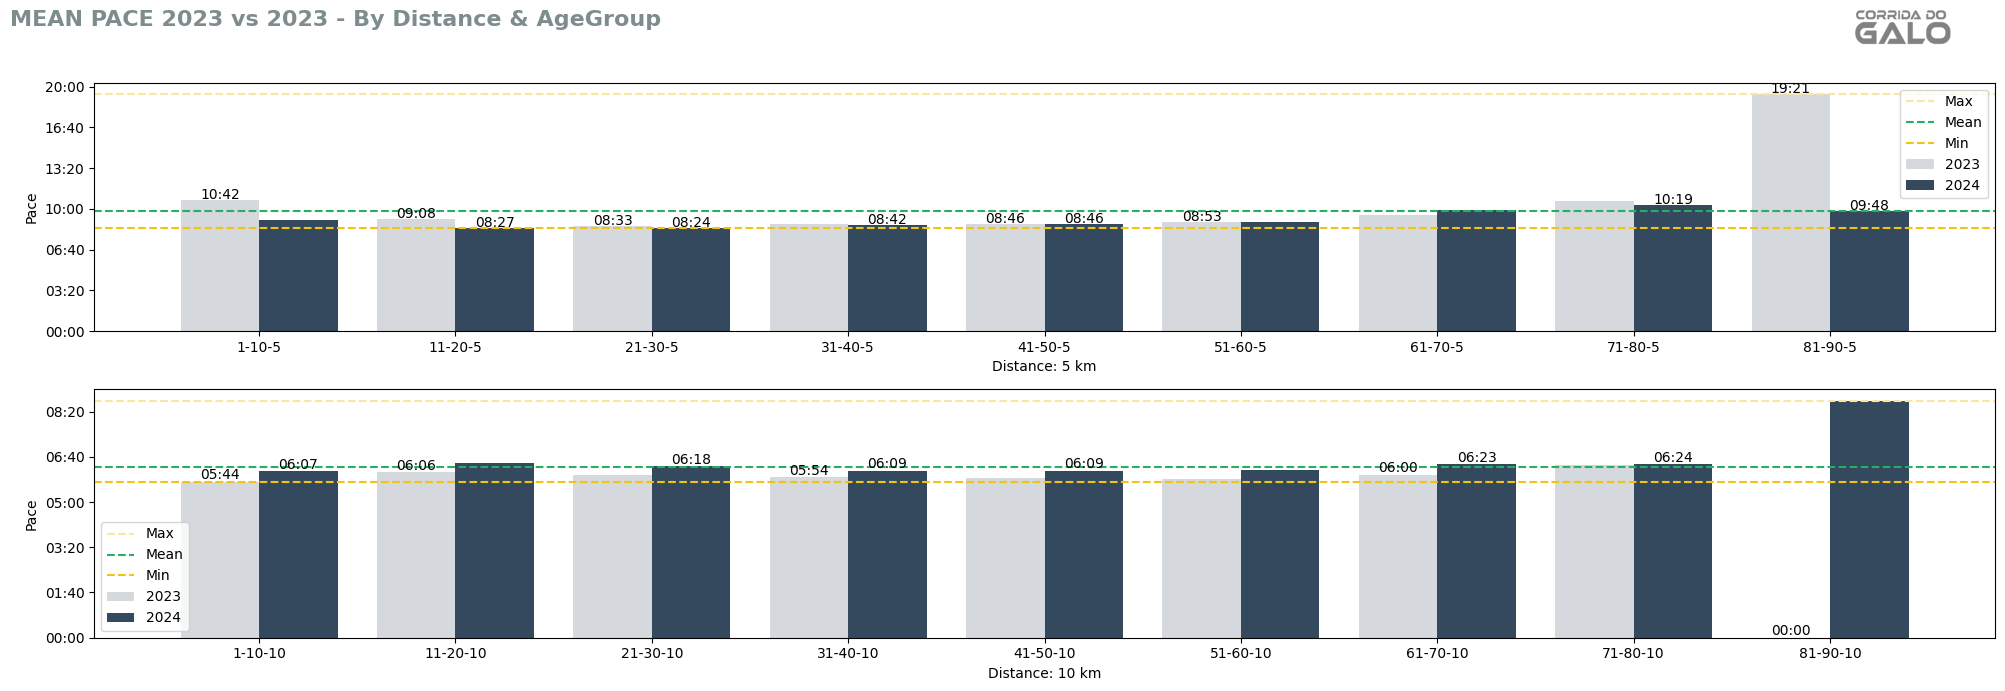

In [25]:
mean_pace_df = get_mean_pace(df, 'total_time_s', 'dist_num', ['age_group', 'year'])
plot_paces(mean_pace_df, display='v', summarize_by=['age_group', 'dist_num'], figsize=(20,7), annotate=0.7, metrics=['max', 'min', 'mean'], fig_title='MEAN PACE 2023 vs 2023 - By Distance & AgeGroup')

MEDIAN PACE By AGE GROUP (2023 vs 2024)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\2757856080.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataframe = pd.DataFrame(dataframe.groupby(groupby_columns)[[total_time_column, dist_column]].median())
C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252851671.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


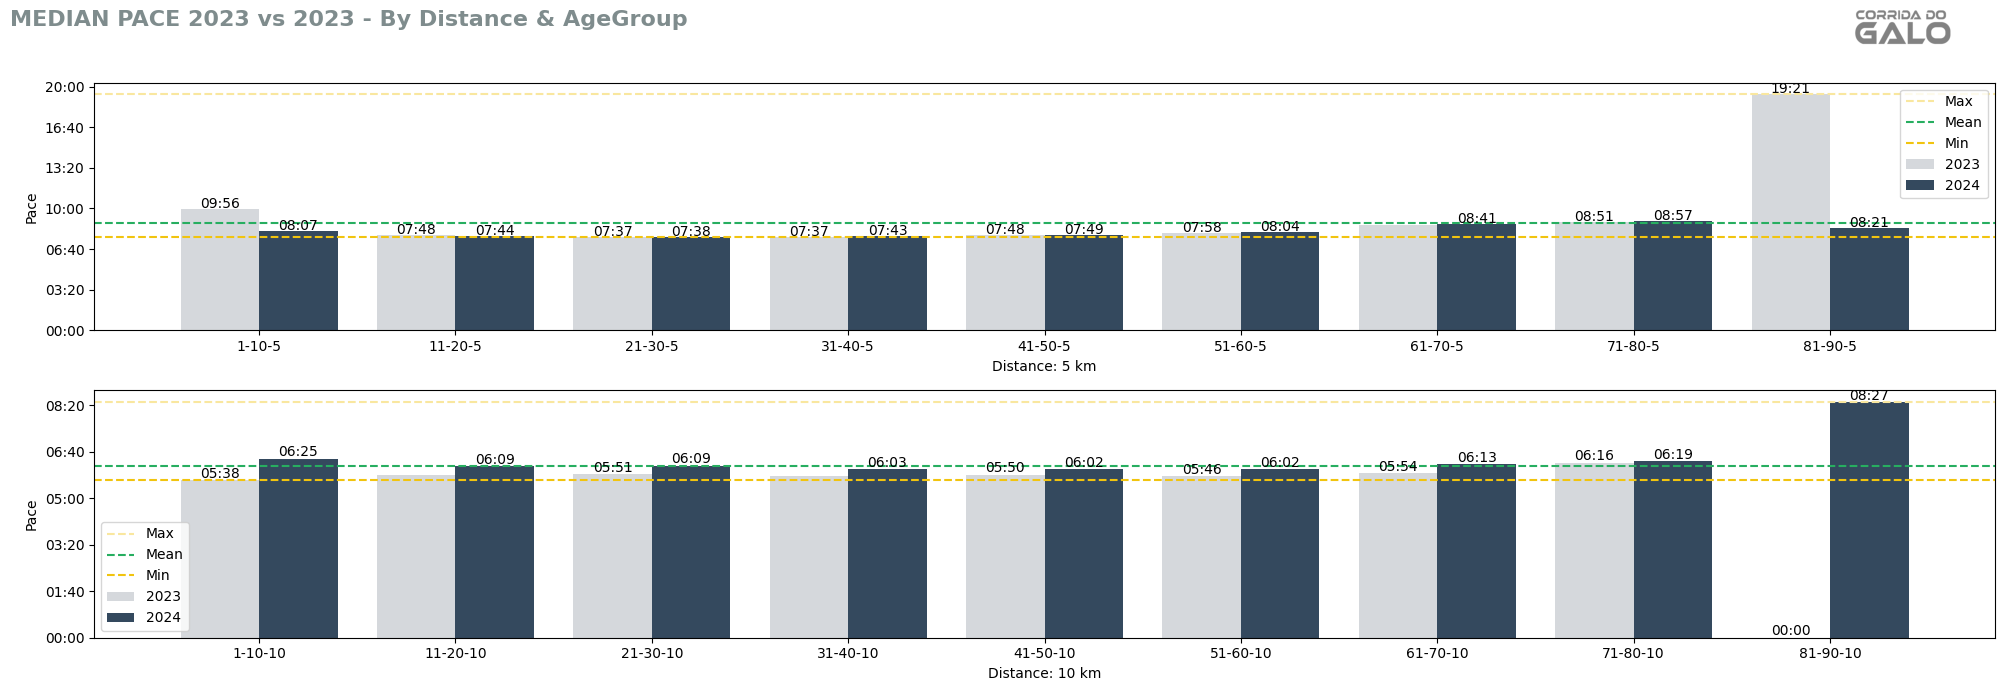

In [26]:
mean_pace_df = get_median_pace(df, 'total_time_s', 'dist_num', ['age_group', 'year'])
plot_paces(mean_pace_df, display='v', summarize_by=['age_group', 'dist_num'], figsize=(20,7), annotate=0.9, metrics=['max', 'min', 'mean'], fig_title='MEDIAN PACE 2023 vs 2023 - By Distance & AgeGroup')

#### 3.2.2. Box Plots: by distance, gender, year, reincidence and has_team

In [27]:
def data_without_outliers_iqr(data):
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    
    # Return the mean of the filtered data
    return filtered_data

In [28]:
def boxplot_by(series_names, series_data, display = 'h', fig_title:str = None, figsize:tuple=(10, 5), add_jitter:bool=True, highlight:dict=None):
    
    if type(series_names[0]) != list:
        series_names = [series_names]

    if type(series_data[0]) != list:
        series_data = [series_data]

    widths=0.6

    if display == 'h':
        n_cols = len(series_names)
        n_rows = 1
    elif display == 'v':
        n_cols = 1
        n_rows = len(series_names)

    fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=figsize)
    if len(series_names) == 1:
        ax = [ax]

    for p, (series_names, series_data) in enumerate(zip(series_names, series_data)):

        # widths=0.6
        # fig, ax = plt.subplots(figsize=(widths*len(series_names)*5, 5))

        if type(series_names) != list:
            series_names = [series_names]

        if type(series_data) != list:
            series_data = [series_data]

        if len(series_names) == len(series_data):
            
            
            if fig_title:
                fig.suptitle(fig_title, fontsize=16, fontweight='bold', x=0, ha='left', color=color_palette['gray_dark'])
                colocar_logo(fig, tamanho=4.3-figsize[1]**(1/2), alpha=0.2)
        
            # for series_name, data in zip(series_names, series_data):
            ax[p].boxplot(series_data, showfliers=False, widths=widths, meanline=True, showmeans=True,)
            ax[p].set_xticklabels(series_names)
            # y = series_data

            for i, (label, y) in enumerate(zip(series_names, series_data), start=1):
                if add_jitter:
                    # Add some random "jitter" to the x-axis
                    x = np.random.normal(i, widths*0.15, size=len(y))
                    ax[p].scatter(x, y, s=0.2, alpha=0.2, color=color_palette['gray_dark'])

                if highlight:
                    for key, value in highlight.items():
                        if key == label:
                            x = np.random.normal(i, widths*0.15, 1)
                            ax[p].scatter(x, value, s=16, color=color_palette['yellow_dark'], edgecolor='black', linewidth=0.5)
                            pace = seconds_to_pace(value, 1)
                            ax[p].annotate(text=f'My pace: {pace}', xy=(x+widths/20, value), fontsize=7, va='center')

                median_seconds = np.median(y)
                mean_seconds = np.mean(y)
                
                # Annotate median
                def annotate_median(va):
                    median_pace = seconds_to_pace(median_seconds, 0)
                    median_pace_text = f'Median: {median_pace}'
                    ax[p].annotate(text=median_pace_text, xy=(i-widths/2.1, median_seconds), fontsize=7, va=va)

                # Annotate mean
                def annotate_mean(va):
                    mean_pace = seconds_to_pace(mean_seconds, 0)
                    mean_pace_text = f'Mean: {mean_pace}'
                    ax[p].annotate(text=mean_pace_text, xy=(i-widths/2.1, mean_seconds), fontsize=7, va=va)

                # Annotate mean
                def annotate_n_size(va):
                    n_size = len(y)
                    n_size_text = f'N size: {n_size}'
                    heigth = np.min(data_without_outliers_iqr(y)) * 0.95
                    ax[p].annotate(text=n_size_text, xy=(i-widths/2.1, heigth), fontsize=7, va=va)

                if not np.isnan(mean_seconds):
                    if median_seconds > mean_seconds:
                        annotate_median('bottom')
                        annotate_mean('top')
                        annotate_n_size('top')
                    else:
                        annotate_median('top')
                        annotate_mean('bottom')
                        annotate_n_size('top')
            
            # Apply custom Y-axis labels
            formatter = FuncFormatter(seconds_to_pace)
            ax[p].yaxis.set_major_formatter(formatter)
            ax[p].set_ylabel('Pace')

        
        else:
            raise('series_name and series_data must have same length')
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()
    return fig, ax

In [29]:
df['pace_s'] = df['total_time_s'] / df['dist_num']

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


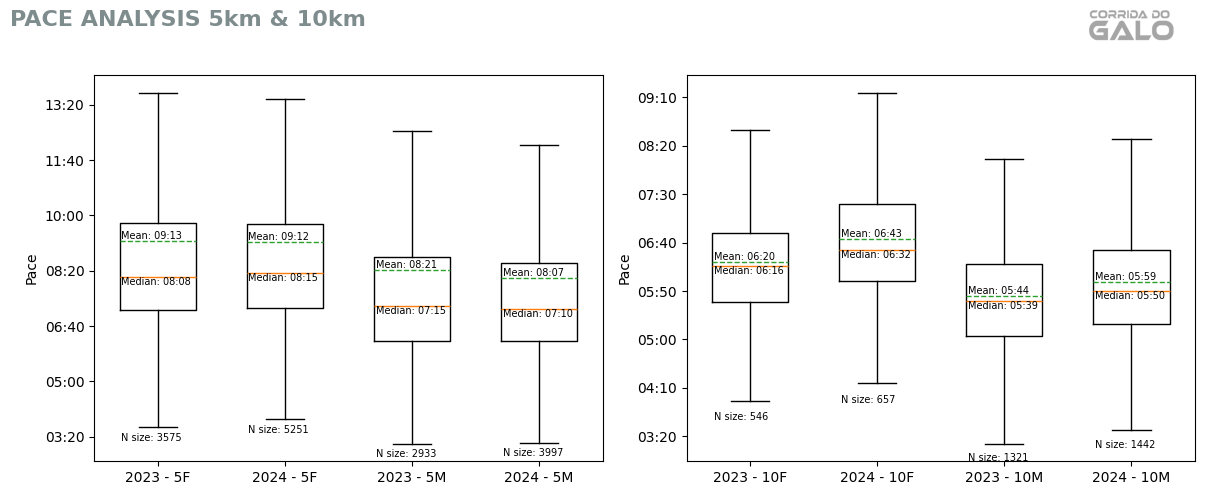

In [30]:

fig_title = 'PACE ANALYSIS 5km & 10km'
series_names_5km = ['2023 - 5F', '2024 - 5F', '2023 - 5M', '2024 - 5M']
series_data_5km = [
    df.loc[(df['year']==2023) & (df['dist_num']==5) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==5) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2023) & (df['dist_num']==5) & (df['gender']=='M'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==5) & (df['gender']=='M'), 'pace_s']
    ]

series_names_10km = ['2023 - 10F', '2024 - 10F', '2023 - 10M', '2024 - 10M']
series_data_10km = [
    df.loc[(df['year']==2023) & (df['dist_num']==10) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==10) & (df['gender']=='F'), 'pace_s'],
    df.loc[(df['year']==2023) & (df['dist_num']==10) & (df['gender']=='M'), 'pace_s'],
    df.loc[(df['year']==2024) & (df['dist_num']==10) & (df['gender']=='M'), 'pace_s']
    ]

fig, ax = boxplot_by(
    series_names=[series_names_5km, series_names_10km], 
    series_data=[series_data_5km, series_data_10km], 
    fig_title=fig_title,
    display='h',
    figsize=(12, 5),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


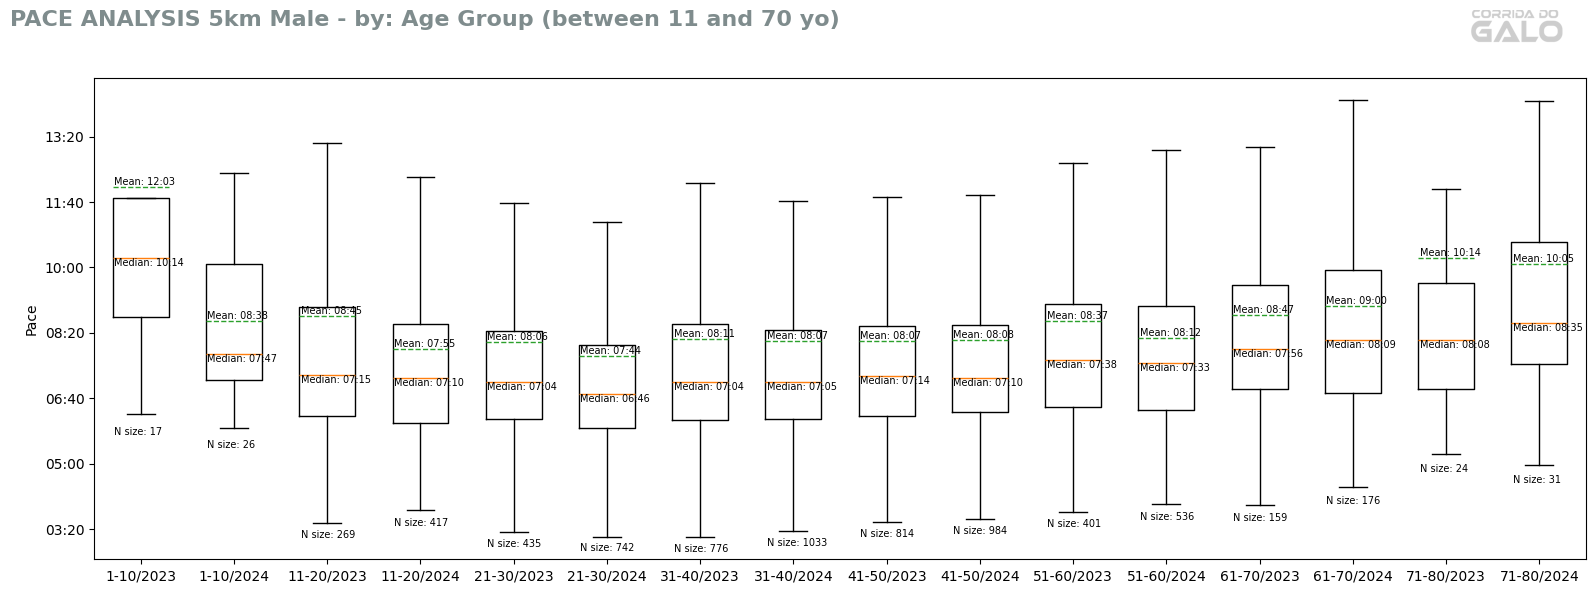

In [31]:
fig_title = 'PACE ANALYSIS 5km Male - by: Age Group (between 11 and 70 yo)'

age_groups = df['age_group'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_5m = []
series_data_5m = []
for age_group in age_groups:
    for year in years:
        data = df.loc[(df['age_group']==age_group) & (df['year']==year) & (df['dist_num']==5) & (df['gender']=='M'), 'pace_s']
        if len(data) > 10:
            series_names_5m.append(f'{age_group}/{year}')
            series_data_5m.append(data)

fig, ax = boxplot_by(
    series_names=series_names_5m, 
    series_data=series_data_5m, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


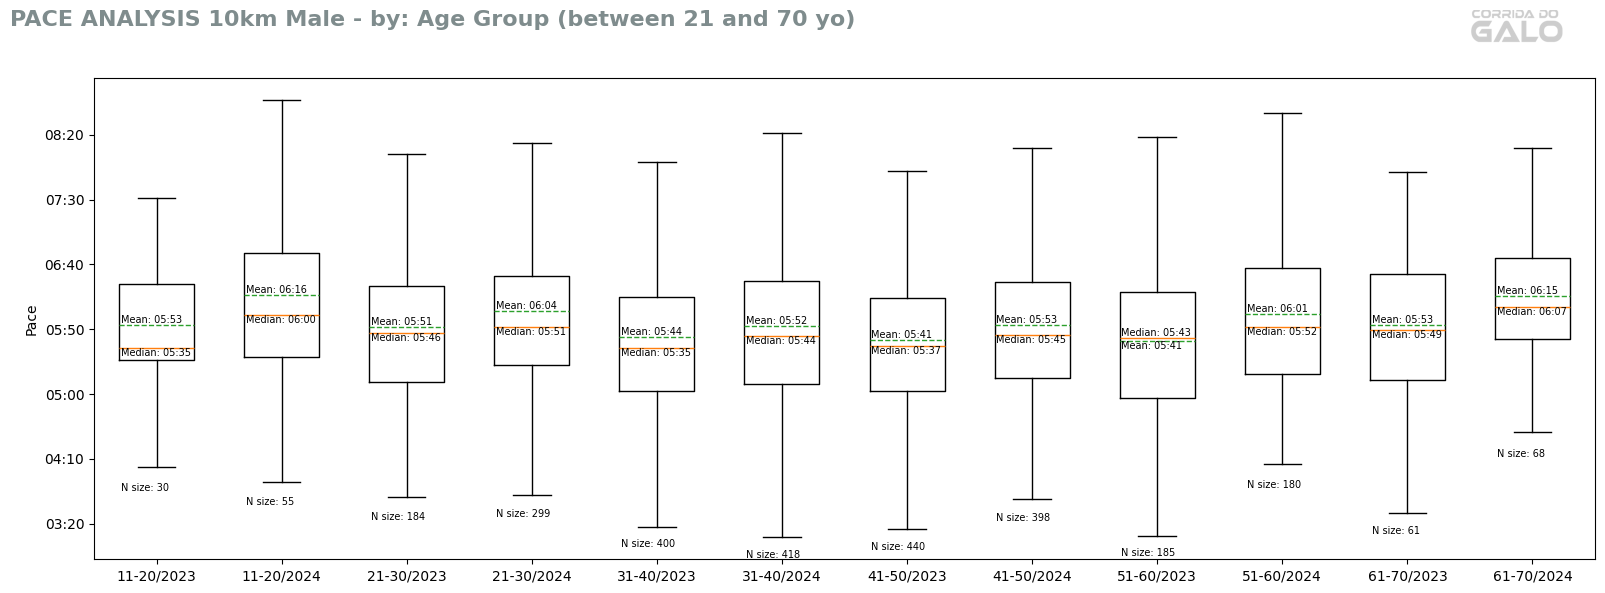

In [32]:
fig_title = 'PACE ANALYSIS 10km Male - by: Age Group (between 21 and 70 yo)'

age_groups = df['age_group'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10m = []
series_data_10m = []
for age_group in age_groups:
    for year in years:
        data = df.loc[(df['age_group']==age_group) & (df['year']==year) & (df['dist_num']==10) & (df['gender']=='M'), 'pace_s']
        if len(data) > 20:
            series_names_10m.append(f'{age_group}/{year}')
            series_data_10m.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10m, 
    series_data=series_data_10m, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


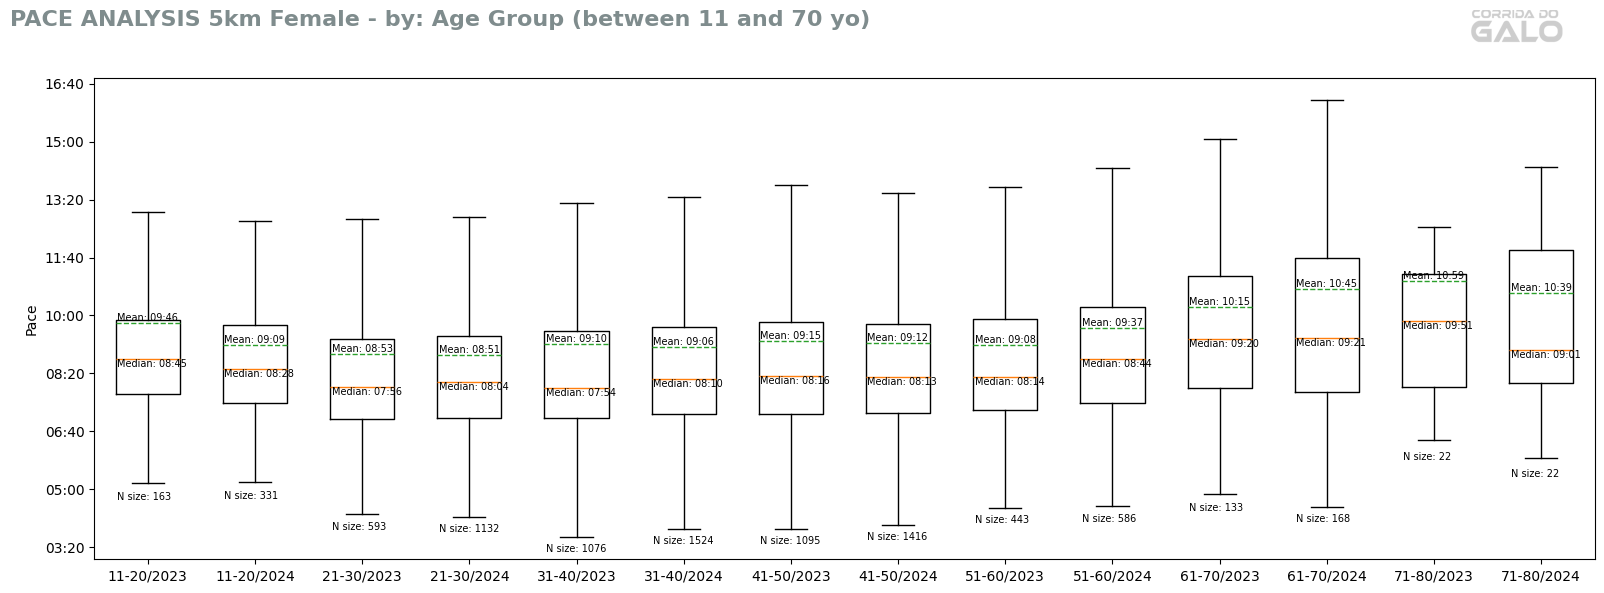

In [33]:
fig_title = 'PACE ANALYSIS 5km Female - by: Age Group (between 11 and 70 yo)'

age_groups = df['age_group'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_5f = []
series_data_5f = []
for age_group in age_groups:
    for year in years:
        data = df.loc[(df['age_group']==age_group) & (df['year']==year) & (df['dist_num']==5) & (df['gender']=='F'), 'pace_s']
        if len(data) > 20:
            series_names_5f.append(f'{age_group}/{year}')
            series_data_5f.append(data)

fig, ax = boxplot_by(
    series_names=series_names_5f, 
    series_data=series_data_5f, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


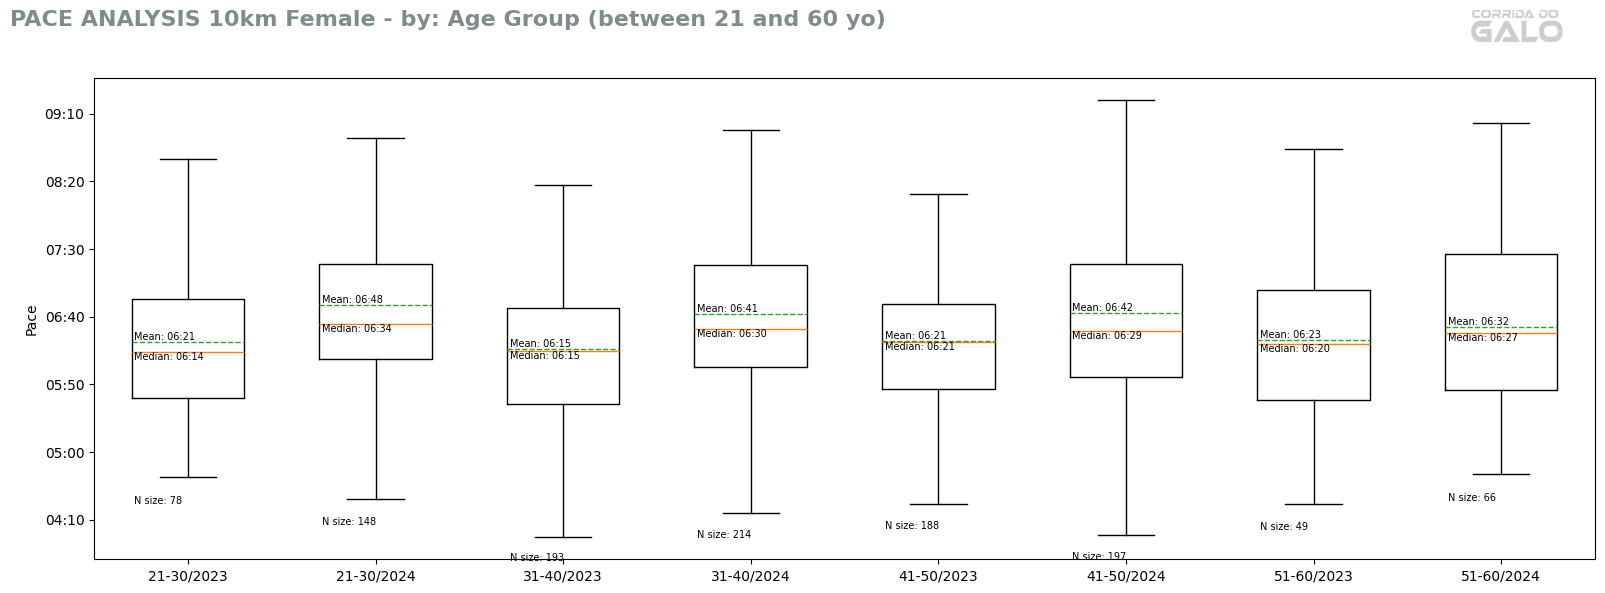

In [34]:
fig_title = 'PACE ANALYSIS 10km Female - by: Age Group (between 21 and 60 yo)'

age_groups = df['age_group'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10f = []
series_data_10f = []
for age_group in age_groups:
    for year in years:
        data = df.loc[(df['age_group']==age_group) & (df['year']==year) & (df['dist_num']==10) & (df['gender']=='F'), 'pace_s']
        if len(data) > 20:
            series_names_10f.append(f'{age_group}/{year}')
            series_data_10f.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10f, 
    series_data=series_data_10f, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


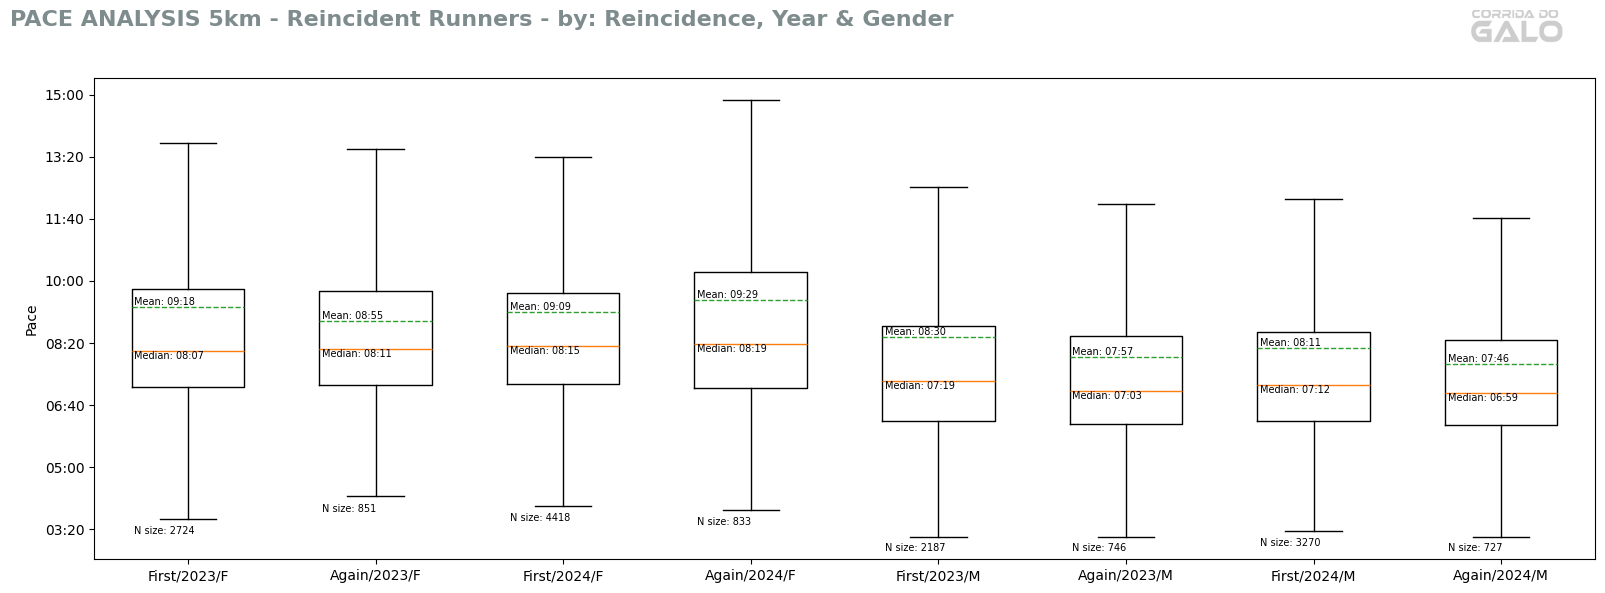

In [35]:
fig_title = 'PACE ANALYSIS 5km - Reincident Runners - by: Reincidence, Year & Gender'

genders = df['gender'].sort_values(ascending=True).unique()
reincidences = df['running_again'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_5 = []
series_data_5 = []
for gender in genders:
    for year in years:
        for reincidence in reincidences:
            data = df.loc[(df['running_again']==reincidence) & (df['year']==year) & (df['dist_num']==5) & (df['gender']==gender), 'pace_s']
            if len(data) > 20:
                reincidence_label = 'Again' if reincidence else 'First'
                series_names_5.append(f'{reincidence_label}/{year}/{gender}')
                series_data_5.append(data)

fig, ax = boxplot_by(
    series_names=series_names_5, 
    series_data=series_data_5, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


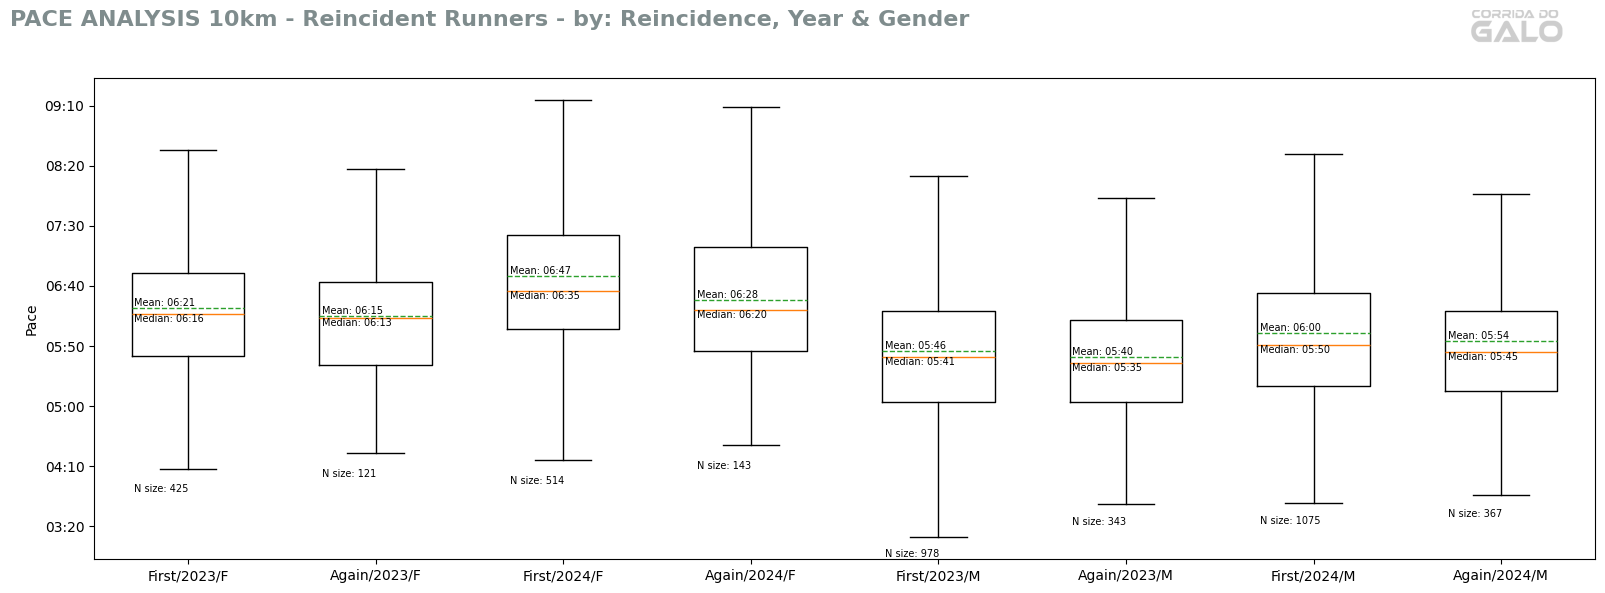

In [36]:
fig_title = 'PACE ANALYSIS 10km - Reincident Runners - by: Reincidence, Year & Gender'

genders = df['gender'].sort_values(ascending=True).unique()
reincidences = df['running_again'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for year in years:
        for reincidence in reincidences:
            data = df.loc[(df['running_again']==reincidence) & (df['year']==year) & (df['dist_num']==10) & (df['gender']==gender), 'pace_s']
            if len(data) > 20:
                reincidence_label = 'Again' if reincidence else 'First'
                series_names_10.append(f'{reincidence_label}/{year}/{gender}')
                series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


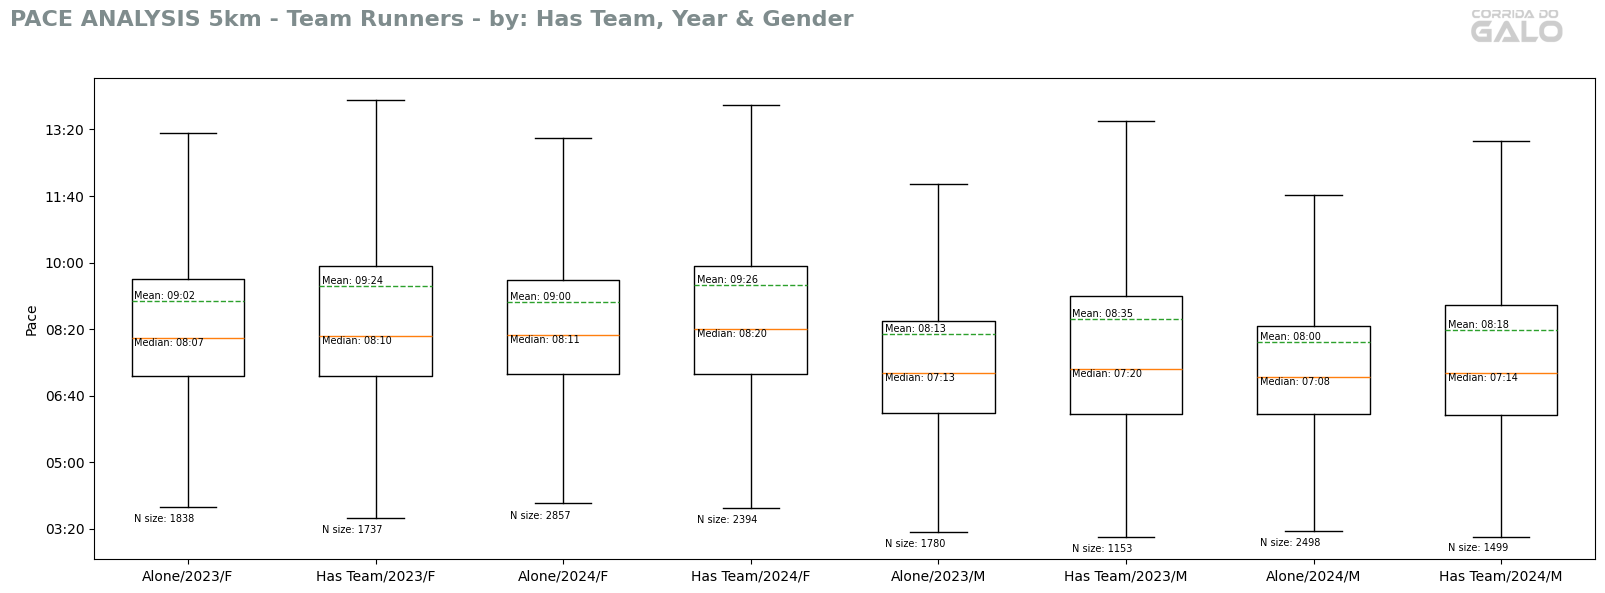

In [37]:
fig_title = 'PACE ANALYSIS 5km - Team Runners - by: Has Team, Year & Gender'

genders = df['gender'].sort_values(ascending=True).unique()
has_teams = df['has_team'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_5 = []
series_data_5 = []
for gender in genders:
    for year in years:
        for has_team in has_teams:
            data = df.loc[(df['has_team']==has_team) & (df['year']==year) & (df['dist_num']==5) & (df['gender']==gender), 'pace_s']
            if len(data) > 20:
                has_team_label = 'Has Team' if has_team else 'Alone'
                series_names_5.append(f'{has_team_label}/{year}/{gender}')
                series_data_5.append(data)

fig, ax = boxplot_by(
    series_names=series_names_5, 
    series_data=series_data_5, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=False)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


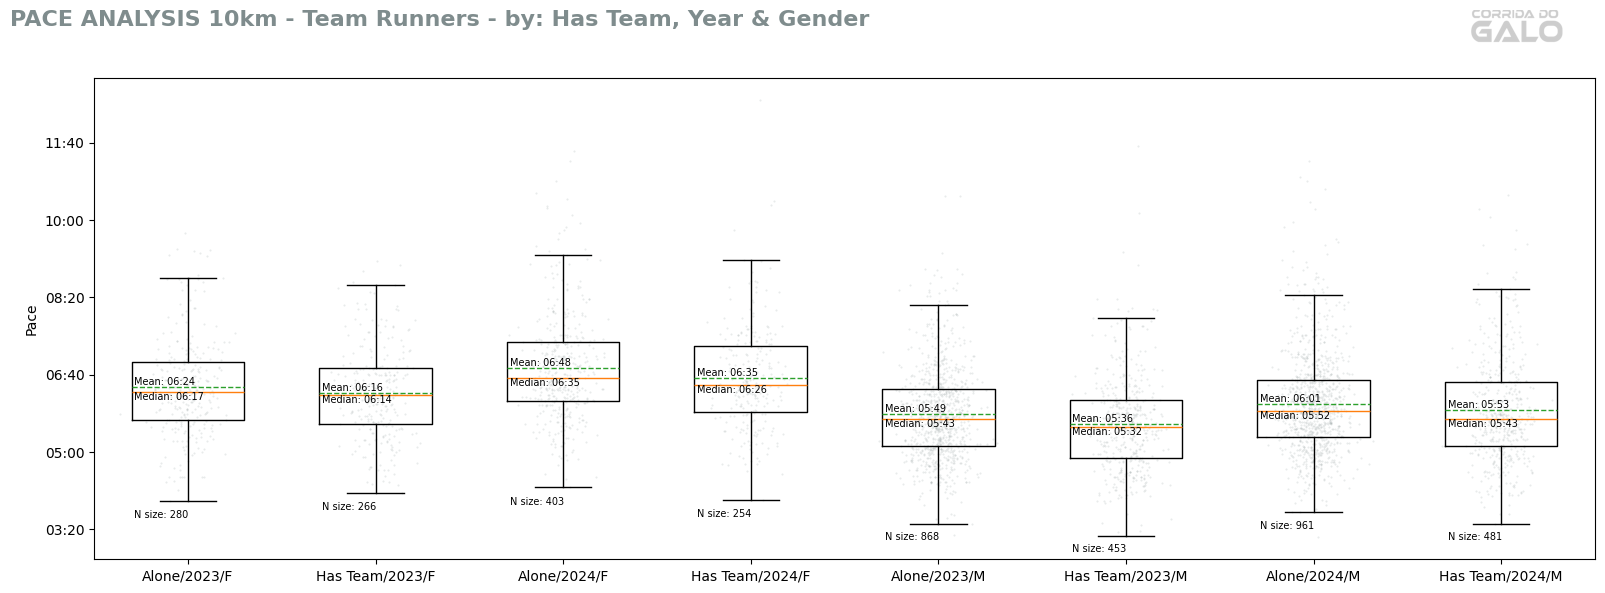

In [38]:
fig_title = 'PACE ANALYSIS 10km - Team Runners - by: Has Team, Year & Gender'

genders = df['gender'].sort_values(ascending=True).unique()
has_teams = df['has_team'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for year in years:
        for has_team in has_teams:
            data = df.loc[(df['has_team']==has_team) & (df['year']==year) & (df['dist_num']==10) & (df['gender']==gender), 'pace_s']
            if len(data) > 20:
                has_team_label = 'Has Team' if has_team else 'Alone'
                series_names_10.append(f'{has_team_label}/{year}/{gender}')
                series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(16, 6),
    add_jitter=True
)

#### 3.2.3. Considerations

5km paces seem to be pretty stable by looking at avgs from 2023 and 2024 runs; Looking closer, is even possible to raise the hypotesis that some groups got better - for example, men from 5km race.

10km paces have gotten worse from 2023 to 2024 - fot both men and women

Athletes who ran both years tend to perform better - except women 5km

Athletes who are part o a team also tend to perform better in 10km - worse in 5km

### 3.3. Personal performance

In [39]:
my_gender = 'M'
my_age_group = '21-30'
my_dist = 10
my_reincidence = 'Again'
my_has_team = 'Alone'
pace_2023 = 371.9
pace_2024 = 319.3

#### 3.3.1. Overall

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


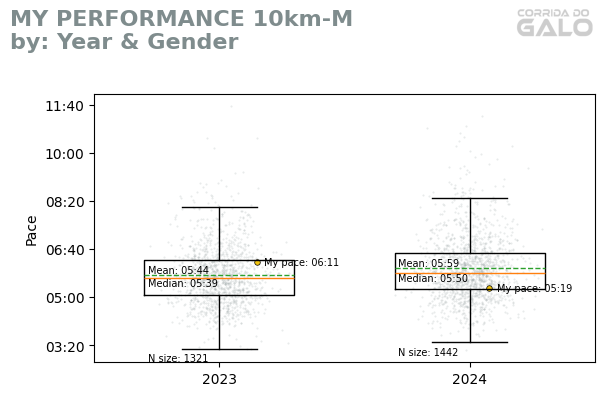

In [40]:
fig_title = 'MY PERFORMANCE 10km-M\nby: Year & Gender'

genders = df.loc[df['gender'] == my_gender, 'gender'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for year in years:
        data = df.loc[(df['year']==year) & (df['gender']==my_gender) & (df['dist_num'] == my_dist), 'pace_s']
        if len(data) > 20:
            series_names_10.append(f'{year}')
            series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(6, 4),
    add_jitter=True,
    highlight={
        '2023': pace_2023,
        '2024': pace_2024
    }
)

#### 3.3.2. In Age Group

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


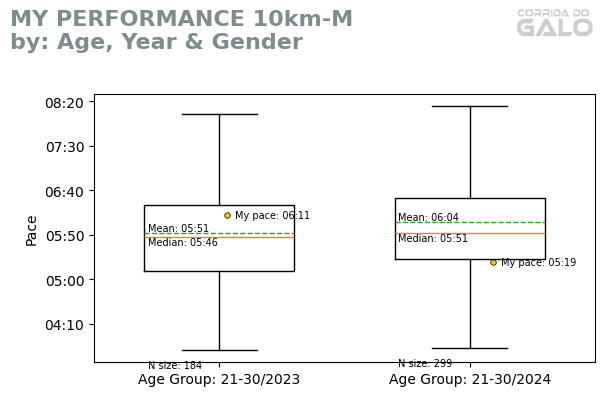

In [41]:
fig_title = 'MY PERFORMANCE 10km-M\nby: Age, Year & Gender'

genders = df.loc[df['gender'] == my_gender, 'gender'].sort_values(ascending=True).unique()
age_groups = df.loc[df['age_group'] == my_age_group, 'age_group'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for age_group in age_groups:
        for year in years:
            data = df.loc[(df['year']==year) & (df['gender']==my_gender) & (df['dist_num'] == my_dist) & (df['age_group'] == age_group), 'pace_s']
            if len(data) > 20:
                series_names_10.append(f'Age Group: {age_group}/{year}')
                series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(6, 4),
    add_jitter=False,
    highlight={
        'Age Group: 21-30/2023': pace_2023,
        'Age Group: 21-30/2024': pace_2024
    }
)

#### 3.3.3. In Reincidents (Running for the first time vs. again)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


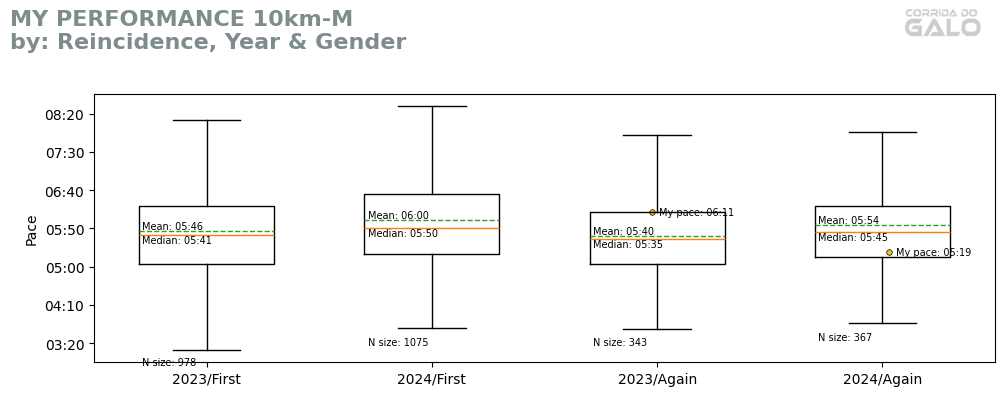

In [42]:
fig_title = 'MY PERFORMANCE 10km-M\nby: Reincidence, Year & Gender'

genders = df.loc[df['gender'] == my_gender, 'gender'].sort_values(ascending=True).unique()
reincidences = df['running_again'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for reincidence in reincidences:
        for year in years:
            data = df.loc[(df['year']==year) & (df['gender']==my_gender) & (df['dist_num'] == my_dist) & (df['running_again'] == reincidence), 'pace_s']
            if len(data) > 20:
                reincidence_label = 'Again' if reincidence else 'First'
                series_names_10.append(f'{year}/{reincidence_label}')
                series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(10, 4),
    add_jitter=False,
    highlight={
        '2023/Again': pace_2023,
        '2024/Again': pace_2024
    }
)

#### 3.3.4. In Reincidents (Running for the first time vs. again)

C:\Users\gabriel.oliveira\AppData\Local\Temp\ipykernel_3796\3252980956.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle


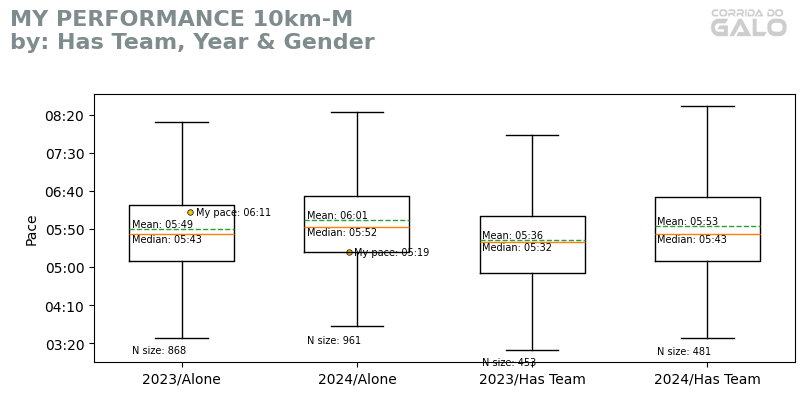

In [43]:
fig_title = 'MY PERFORMANCE 10km-M\nby: Has Team, Year & Gender'

genders = df.loc[df['gender'] == my_gender, 'gender'].sort_values(ascending=True).unique()
has_teams = df['has_team'].sort_values(ascending=True).unique()
years = df['year'].sort_values(ascending=True).unique()
series_names_10 = []
series_data_10 = []
for gender in genders:
    for has_team in has_teams:
        for year in years:
            data = df.loc[(df['year']==year) & (df['gender']==my_gender) & (df['dist_num'] == my_dist) & (df['has_team'] == has_team), 'pace_s']
            if len(data) > 20:
                has_team_label = 'Has Team' if has_team else 'Alone'
                series_names_10.append(f'{year}/{has_team_label}')
                series_data_10.append(data)

fig, ax = boxplot_by(
    series_names=series_names_10, 
    series_data=series_data_10, 
    fig_title=fig_title,
    display='v',
    figsize=(8, 4),
    add_jitter=False,
    highlight={
        '2023/Alone': pace_2023,
        '2024/Alone': pace_2024
    }
)

## 4. Hypothesis

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

data = df.loc[df['year'] == 2023]
data = data[['gender', 'pace_s', 'has_team', 'running_again', 'age']]

# for col in data.select_dtypes(include='object').columns:
#     data[col] = data[col].astype('category')

# for col in data.select_dtypes(include='category').columns:
#     data[col] = LabelEncoder().fit_transform(data[col])

print(data.info())

# Encoding categorical variables
data_encoded = pd.get_dummies(data)

# Scaling numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Convert the scaled data back into a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 8375 entries, 11347 to 19721
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         8375 non-null   object 
 1   pace_s         8375 non-null   float64
 2   has_team       8375 non-null   bool   
 3   running_again  8375 non-null   bool   
 4   age            8375 non-null   int64  
dtypes: bool(2), float64(1), int64(1), object(1)
memory usage: 278.1+ KB
None


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
data_encoded = pd.get_dummies(data.drop('running_again', axis=1))

# Scale numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Add target column back to the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled_df['running_again'] = data['running_again']
print(data['running_again'])

# Step 2: Split the Data
X = data_scaled_df.drop('running_again', axis=1)  # Features
y = data['running_again']              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Step 3: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=20)
rf_classifier.fit(X_train, y_train)

# Step 4: Make Predictions and Evaluate the Model
y_pred = rf_classifier.predict(X_test)

# Print accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_true=y_test, y_pred=y_pred))

11347    False
11348    False
11349    False
11350    False
11351    False
         ...  
19717    False
19718    False
19719    False
19720     True
19721    False
Name: running_again, Length: 8375, dtype: bool
Accuracy: 0.6790830945558739
Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.83      0.80      3181
        True       0.27      0.19      0.23      1007

    accuracy                           0.68      4188
   macro avg       0.52      0.51      0.51      4188
weighted avg       0.65      0.68      0.66      4188

Confusion Matrix [[2648  533]
 [ 811  196]]


In [109]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Confusion Matrix", confusion_matrix(y_true=y_test, y_pred=y_pred_logistic))

Logistic Regression Accuracy: 0.7595510983763133
Classification Report:
               precision    recall  f1-score   support

       False       0.76      1.00      0.86      3181
        True       0.00      0.00      0.00      1007

    accuracy                           0.76      4188
   macro avg       0.38      0.50      0.43      4188
weighted avg       0.58      0.76      0.66      4188

Confusion Matrix [[3181    0]
 [1007    0]]


c:\Users\gabriel.oliveira\OneDrive - PJUS INVESTIMENTOS EM DIREITOS CREDITORIOS LTDA\Documentos\projects\28_galo_race\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.oliveira\OneDrive - PJUS INVESTIMENTOS EM DIREITOS CREDITORIOS LTDA\Documentos\projects\28_galo_race\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabriel.oliveira\OneDrive - PJUS INVESTIMENTOS EM DIREITOS CREDITORIOS LTDA\Documentos\projects\28_galo_race\env\Lib\site-packages\sklearn\metrics\_classific

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Train the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7039159503342884
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.88      0.82      3181
        True       0.27      0.14      0.19      1007

    accuracy                           0.70      4188
   macro avg       0.52      0.51      0.50      4188
weighted avg       0.65      0.70      0.67      4188



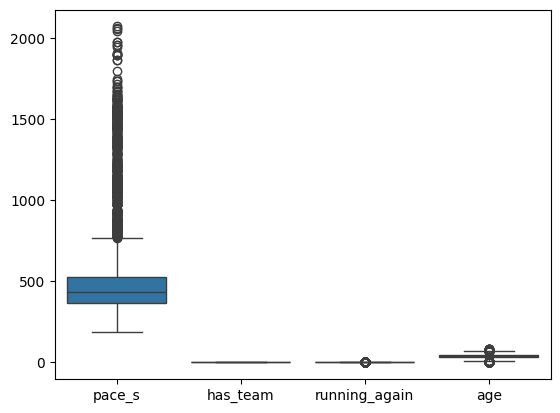

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data)  # Visualize outliers
plt.show()

In [117]:
# Check for missing values
print(data.isnull().sum())

# Check class distribution
print(y.value_counts())

# Scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Random Forest Classifier with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


gender           0
pace_s           0
has_team         0
running_again    0
age              0
dtype: int64
running_again
False    6314
True     2061
Name: count, dtype: int64
Accuracy: 0.6980733702823965
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.71      0.70      1913
        True       0.70      0.68      0.69      1876

    accuracy                           0.70      3789
   macro avg       0.70      0.70      0.70      3789
weighted avg       0.70      0.70      0.70      3789



In [46]:
# import seaborn as sns

# # Add the cluster labels to the original data
# data_encoded['Cluster'] = data['Cluster']

# # Use Seaborn's pairplot
# sns.pairplot(data_encoded, hue='Cluster', diag_kind='kde', palette='viridis')
# plt.suptitle('Pair Plot of Clusters', y=1.02)
# plt.show()

In [47]:
from pandas.plotting import parallel_coordinates

# Plot parallel coordinates with cluster as color
plt.figure(figsize=(10, 6))
parallel_coordinates(data_encoded, class_column='Cluster', color=plt.cm.viridis.colors)
plt.title('Parallel Coordinates Plot of Clusters')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Cluster'

<Figure size 1000x600 with 0 Axes>

In [49]:
data.to_excel('clusters.xlsx')